# Crop bands to 7200*7200

In [15]:
# import gdal
# import torch 
# import os


# band_fns= [im for im in os.listdir('./data/2014_121_64/') if (im.split('.')[-1]=='rst' and im.split('.')[0]!='Ponds')]
# i=0

# for band_fn in band_fns:
#     in_ds = gdal.Open('./data/2014_121_64/'+band_fn)
#     in_band=in_ds.GetRasterBand(1)
#     band=in_band.ReadAsArray(0,7300,7200,7200).astype('float')
#     i+=1
#     out_ds = gdal.GetDriverByName('GTiff').Create('./data/2014_121_64/croped_Band{}.tif'.format(i),7200,7200, 1, 1)
#     out_band=out_ds.GetRasterBand(1)
#     out_band.WriteArray(band)
#     out_band.ComputeStatistics(False)
#     out_ds.SetProjection(in_ds.GetProjection())
#     out_ds.SetGeoTransform((in_ds.GetGeoTransform()[0], 15.0, 0.0, in_ds.GetGeoTransform()[3]-15.0*7300, 0.0, -15.0))
#     out_ds.FlushCache()
#     del out_ds

# Crop pond to 7200*7200

In [1]:
import gdal
import torch 
import os

band_fn='./data/2014_121_64/PondsPMongrove.rst'

in_ds = gdal.Open(band_fn)
in_band=in_ds.GetRasterBand(1)
band=in_band.ReadAsArray(0,7300,7200,7200).astype('float')

out_ds = gdal.GetDriverByName('GTiff').Create('./data/2014_121_64/cropedPonds.tif',7200,7200, 1, 1)
out_band=out_ds.GetRasterBand(1)
out_band.WriteArray(band)
out_band.ComputeStatistics(False)
out_ds.SetProjection(in_ds.GetProjection())
out_ds.SetGeoTransform((in_ds.GetGeoTransform()[0], 15.0, 0.0, in_ds.GetGeoTransform()[3]-15.0*7300, 0.0, -15.0))
out_ds.FlushCache()
del out_ds

# Random Crop to 512*512

In [51]:
import torch 
import torchvision.transforms as tfs
import gdal
from datetime import datetime
import os

band_fns= [im for im in os.listdir('./data/2014_121_64/croppedrst/') if (im.split('.')[-1]=='rst')]

prev_time = datetime.now()

bands_dict={}
for i in range(8):
    in_ds=gdal.Open('./data/2014_121_64/croppedrst/'+band_fns[i])
    in_band=in_ds.GetRasterBand(1)
    bands_dict['b{}'.format(i+1)]=in_band.ReadAsArray().astype('float')
for i in range(100):
    batch_1=[]
    x=int(torch.randint(0,6689,(1,)).item())
    y=int(torch.randint(0,6689,(1,)).item())
    for j in range(8):
        img=bands_dict['b{}'.format(j+1)]
        img=torch.from_numpy(img[x:x+512,y:y+512]).unsqueeze(0)
        batch_1.append(img)
    batch_1=tuple(batch_1)
    traindata=torch.cat(batch_1[:-1],0).unsqueeze(0)
    label=batch_1[-1]


cur_time = datetime.now()
h, remainder = divmod((cur_time - prev_time).seconds, 3600)
m, s = divmod(remainder, 60)
time_str = "Time %02d:%02d:%02d" % (h, m, s)
print(time_str,traindata.size(),label.size())

Time 00:00:03 torch.Size([1, 7, 512, 512]) torch.Size([1, 512, 512])


In [48]:
x=torch.nn.functional.log_softmax(traindata,dim=1)
print(x.size())
y=torch.randint(0,2,(1,512,512),dtype=torch.long)
torch.nn.NLLLoss()(x,y)

torch.Size([1, 7, 512, 512])


tensor(1.9459, dtype=torch.float64)

In [44]:
data = torch.randn(1, 16, 10, 10)
m = torch.nn.Conv2d(16, 4, (3, 3))
m(data).size()

torch.Size([1, 4, 8, 8])

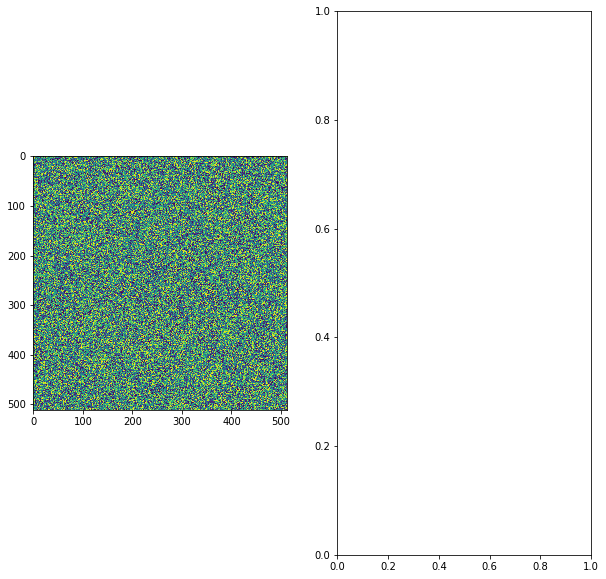

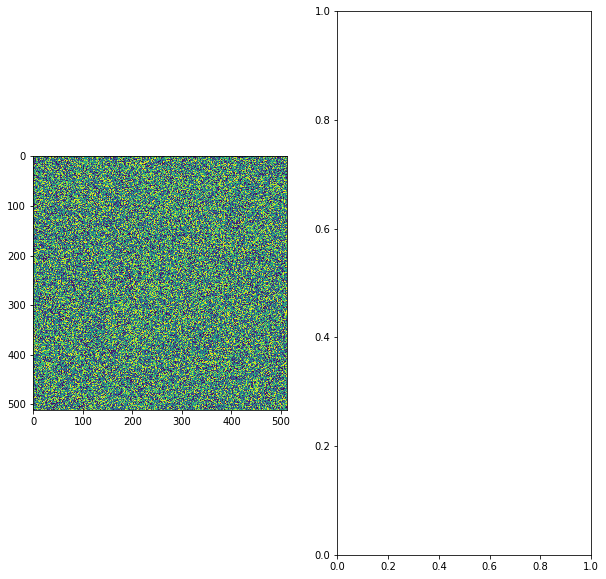

In [26]:
import matplotlib.pyplot as plt
import torch
%matplotlib inline

for i in range(2):
    x=torch.randint(0,256,(512,512))
    _,figs=plt.subplots(1,2,figsize=(10,10))
    figs[0].imshow(x)